In [ ]:
Figure 6 is a sensitivity analysis across various model parameter variations

# TODO: remove any non-unique parameters, and include the noise parameter (this noise parameter seems to be the issue)

In [23]:
include(joinpath("..","src","setup.jl"))

RObject{VecSxp}
$rcalljl_options
$rcalljl_options$width
[1] 800

$rcalljl_options$height
[1] 400




In [24]:
datadir = joinpath("..","data","count_lengths","run_2018-12-06")

"../data/count_lengths/run_2018-12-06"

In [25]:
noise_datadir = joinpath(datadir,"..","run_2018-12-14")

"../data/count_lengths/run_2018-12-06/../run_2018-12-14"

In [26]:
fields = [:f_c_a,:f_c_m,:f_c_σ,:s_c_a,:s_c_m,:s_c_σ,:t_c_a,:t_c_m,:t_c_σ,
          :f_τ_a,:f_τ_m,:s_τ_a,:s_τ_m,:t_τ_a,:t_τ_m];

In [94]:
params = load_params(joinpath(datadir,"params.jld2"))
params[:pindex] = 1:size(params,1)
settings = joinpath("..","src","settings.toml")

results = []
for_results_in(joinpath(datadir,"data")) do entry
  push!(results,DataFrame(length=entry["lengths"],
                          percepts=entry["percepts"].+1, # after +1, indicates the number of streams reported, 1 or 2
                          created=entry["created"],
                          pindex=entry["pindex"])) # the parameter index (pindex = N correspondes to row N of `params`)
end
df = vcat(results...);
head(df)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:18


,length,percepts,created,pindex
,Float64,Int64,DateTime,Int64
1,0.3,1,2018-12-06T23:52:05.717,1
2,0.9,2,2018-12-06T23:52:05.717,1
3,4.4,1,2018-12-06T23:52:05.717,1
4,0.6,2,2018-12-06T23:52:05.717,1
5,3.0,1,2018-12-06T23:52:05.717,1
6,0.3,2,2018-12-06T23:52:05.717,1


In [95]:
# turns out there are some non-unique parameter values with this; remove those (in the future do it before running the simulation)
paramssel = unique!(params,[fields;:Δf])
size(paramssel,1)

1575

In [96]:
size(df)

(448632, 4)

In [97]:
dfsel = @where(df,in.(:pindex,Ref(paramssel.pindex)));
size(dfsel)

(348782, 4)

In [98]:
paramssel[:old_pindex] = paramssel.pindex;
dfsel[:old_pindex] = dfsel.pindex;

In [99]:
paramssel[:pindex] = 1:size(uparams,1)
for row in 1:size(dfsel,1)
    i = findfirst(isequal(dfsel.old_pindex[row]),paramssel.old_pindex)
    if i isa Nothing
        error("Can't find old_pindex $(dfsel.old_pindex[row])")
    end
    dfsel.pindex[row] = paramssel.pindex[i]
end
head(dfsel)

,length,percepts,created,pindex,old_pindex
,Float64,Int64,DateTime,Int64,Int64
1,0.3,1,2018-12-06T23:52:05.717,1,1
2,0.9,2,2018-12-06T23:52:05.717,1,1
3,4.4,1,2018-12-06T23:52:05.717,1,1
4,0.6,2,2018-12-06T23:52:05.717,1,1
5,3.0,1,2018-12-06T23:52:05.717,1,1
6,0.3,2,2018-12-06T23:52:05.717,1,1


In [100]:
delete!(dfsel,:old_pindex);
delete!(paramssel,:old_pindex);

In [101]:
print(maximum(paramssel.pindex))
size(paramssel)

1575

(1575, 36)

we've gotten rid of the redundant parameters, now load the missing noise variations

In [102]:
params = load_params(joinpath(noise_datadir,"params.jld2"))
params[:pindex] = 1:size(params,1)

results = []
for_results_in(joinpath(noise_datadir,"data")) do entry
  push!(results,DataFrame(length=entry["lengths"],
                          percepts=entry["percepts"].+1, # after +1, indicates the number of streams reported, 1 or 2
                          created=entry["created"],
                          pindex=entry["pindex"])) # the parameter index (pindex = N correspondes to row N of `params`)
end
df = vcat(results...);
head(df)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:07


,length,percepts,created,pindex
,Float64,Int64,DateTime,Int64
1,5.6,1,2018-12-17T14:16:27.018,1
2,0.6,2,2018-12-17T14:16:27.018,1
3,3.0,1,2018-12-17T14:16:27.018,1
4,0.3,2,2018-12-17T14:16:27.018,1
5,0.9,1,2018-12-17T14:16:27.018,1
6,0.9,2,2018-12-17T14:16:27.018,1


In [103]:
maximum(params.pindex)

675

In [104]:
size(params)

(675, 36)

In [105]:
df.pindex .+= maximum(dfsel.pindex);
params.pindex .+= maximum(paramssel.pindex);

In [106]:
df = vcat(dfsel,df);
params = vcat(paramssel,params)

,f_W_m_σ,f_c_m,t_c_a,t_c_m,f,t_W_m_c,t_c_x,f_c_x,t_W_m_σ_t,s_τ_σ,f_c_a,f_c_σ,s_c_m,f_τ_a,s_c_σ,Δt,s_τ_m,s_c_x,t_W_m_σ_ϕ,t_τ_a,s_c_a,t_τ_m,t_c_σ,t_τ_x,s_W_m_c,s_τ_a,f_W_m_c,t_τ_σ,f_τ_σ,f_τ_x,Δf,t_W_m_σ_N,f_τ_m,s_τ_x,s_W_m_σ,pindex
,Float64,Float64,Float64,Float64,Quantity…,Float64,Float64,Float64,Float64,Quantity…,Float64,Float64,Float64,Quantity…,Float64,Quantity…,Quantity…,Float64,Float64,Quantity…,Float64,Quantity…,Float64,Quantity…,Float64,Quantity…,Float64,Quantity…,Quantity…,Quantity…,Int64,Float64,Quantity…,Quantity…,Float64,Int64
1,5.6,0.0,0.0,0.0,500 Hz,6.0,3.0,3.0,7.0,500 ms,0.0,0.2,0.0,1.0 s,0.0,120 ms,0.35 s,3.0,7.0,3.0 s,0.0,0.35 s,0.0,500 ms,6.0,3.0 s,6.0,500 ms,500 ms,500 ms,3,3.0,0.35 s,500 ms,15.0,1
2,5.6,5.0,0.0,0.0,500 Hz,6.0,3.0,3.0,7.0,500 ms,0.0,0.2,0.0,1.0 s,0.0,120 ms,0.35 s,3.0,7.0,3.0 s,0.0,0.35 s,0.0,500 ms,6.0,3.0 s,6.0,500 ms,500 ms,500 ms,3,3.0,0.35 s,500 ms,15.0,2
3,5.6,63.0,0.0,0.0,500 Hz,6.0,3.0,3.0,7.0,500 ms,0.0,0.2,0.0,1.0 s,0.0,120 ms,0.35 s,3.0,7.0,3.0 s,0.0,0.35 s,0.0,500 ms,6.0,3.0 s,6.0,500 ms,500 ms,500 ms,3,3.0,0.35 s,500 ms,15.0,3
4,5.6,790.0,0.0,0.0,500 Hz,6.0,3.0,3.0,7.0,500 ms,0.0,0.2,0.0,1.0 s,0.0,120 ms,0.35 s,3.0,7.0,3.0 s,0.0,0.35 s,0.0,500 ms,6.0,3.0 s,6.0,500 ms,500 ms,500 ms,3,3.0,0.35 s,500 ms,15.0,4
5,5.6,10000.0,0.0,0.0,500 Hz,6.0,3.0,3.0,7.0,500 ms,0.0,0.2,0.0,1.0 s,0.0,120 ms,0.35 s,3.0,7.0,3.0 s,0.0,0.35 s,0.0,500 ms,6.0,3.0 s,6.0,500 ms,500 ms,500 ms,3,3.0,0.35 s,500 ms,15.0,5
6,5.6,0.0,0.0,0.0,500 Hz,6.0,3.0,3.0,7.0,500 ms,5.0,0.2,0.0,1.0 s,0.0,120 ms,0.35 s,3.0,7.0,3.0 s,0.0,0.35 s,0.0,500 ms,6.0,3.0 s,6.0,500 ms,500 ms,500 ms,3,3.0,0.35 s,500 ms,15.0,6
7,5.6,5.0,0.0,0.0,500 Hz,6.0,3.0,3.0,7.0,500 ms,5.0,0.2,0.0,1.0 s,0.0,120 ms,0.35 s,3.0,7.0,3.0 s,0.0,0.35 s,0.0,500 ms,6.0,3.0 s,6.0,500 ms,500 ms,500 ms,3,3.0,0.35 s,500 ms,15.0,7
8,5.6,63.0,0.0,0.0,500 Hz,6.0,3.0,3.0,7.0,500 ms,5.0,0.2,0.0,1.0 s,0.0,120 ms,0.35 s,3.0,7.0,3.0 s,0.0,0.35 s,0.0,500 ms,6.0,3.0 s,6.0,500 ms,500 ms,500 ms,3,3.0,0.35 s,500 ms,15.0,8
9,5.6,790.0,0.0,0.0,500 Hz,6.0,3.0,3.0,7.0,500 ms,5.0,0.2,0.0,1.0 s,0.0,120 ms,0.35 s,3.0,7.0,3.0 s,0.0,0.35 s,0.0,500 ms,6.0,3.0 s,6.0,500 ms,500 ms,500 ms,3,3.0,0.35 s,500 ms,15.0,9


In [107]:
size(params)

(2250, 36)

In [111]:
progress = Progress(length(groupby(params,fields)))
df_summary = by(params,fields) do row
    next!(progress)
    err = model_error(df,params;(k => row[1,k] for k in fields)...)
    DataFrame(stream_error = err.stream,length_error = err.lengths,eratio = error_ratio(err))
end
head(df_summary)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:05


,f_c_a,f_c_m,f_c_σ,s_c_a,s_c_m,s_c_σ,t_c_a,t_c_m,t_c_σ,f_τ_a,f_τ_m,s_τ_a,s_τ_m,t_τ_a,t_τ_m,stream_error,length_error,eratio
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Quantity…,Quantity…,Quantity…,Quantity…,Quantity…,Quantity…,Float64,Float64,Float64
1,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,1.0 s,0.35 s,3.0 s,0.35 s,3.0 s,0.35 s,0.245575,0.448907,1.81029
2,0.0,5.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,1.0 s,0.35 s,3.0 s,0.35 s,3.0 s,0.35 s,0.262555,0.660822,2.26947
3,0.0,63.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,1.0 s,0.35 s,3.0 s,0.35 s,3.0 s,0.35 s,0.274547,1.0,2.94372
4,0.0,790.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,1.0 s,0.35 s,3.0 s,0.35 s,3.0 s,0.35 s,0.275776,1.0,2.94863
5,0.0,10000.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,1.0 s,0.35 s,3.0 s,0.35 s,3.0 s,0.35 s,0.275648,1.0,2.94812
6,5.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,1.0 s,0.35 s,3.0 s,0.35 s,3.0 s,0.35 s,0.246174,0.251235,1.44766


In [112]:
dfplot = @linq df_summary |>
    rename_levels_for([:stream_error,:length_error,:eratio],suffixes=[:c_a,:c_m,:τ_a,:τ_m,:c_σ]) |>
    transform(a = packaxes(:c_a), m = packaxes(:c_m), rand = randn(length(:c_a))) |>
    transform(eratio_str = fmt.("01.2f",:eratio))
              
head(dfplot)

,c_a,c_m,τ_a,τ_m,c_σ,level,stream_error,length_error,eratio,a,m,rand,eratio_str
,Float64,Float64,Quantity…,Quantity…,Float64,String,Float64,Float64,Float64,Float64,Float64,Float64,String
1,0.0,0.0,1.0 s,0.35 s,0.2,Peripheral,0.245575,0.448907,1.81029,0.0,0.0,1.44393,1.81
2,0.0,5.0,1.0 s,0.35 s,0.2,Peripheral,0.262555,0.660822,2.26947,0.0,1.5,1.64821,2.27
3,0.0,63.0,1.0 s,0.35 s,0.2,Peripheral,0.274547,1.0,2.94372,0.0,2.5,0.595077,2.94
4,0.0,790.0,1.0 s,0.35 s,0.2,Peripheral,0.275776,1.0,2.94863,0.0,3.5,-0.159017,2.95
5,0.0,10000.0,1.0 s,0.35 s,0.2,Peripheral,0.275648,1.0,2.94812,0.0,5.0,-0.233405,2.95
6,5.0,0.0,1.0 s,0.35 s,0.2,Peripheral,0.246174,0.251235,1.44766,1.5,0.0,-1.48253,1.45


In [ ]:
dfplot[:variation] = "unknown"
dfplot[:varvalue] = NaN
sel = dfplot.τ_a .!= 3.0s
dfplot[sel].variation = "τ_a"
dfplot[sel].varvalue = ustrip.(uconvert.(s,dfplot[sel].τ_a))

sel = dflplot.τ_m .!= 350ms
dfplot[sel].variation = "τ_m"
dfplot[sel].varvalue = ustrip.(uconvert.(s,dfplot[sel].τ_m))

sel = dflplot.c_σ .!= 0.02
# TODO: etc.. 

# From here I should be able to compute a range, as well as means for each variation, and then plot these
# with a different symbol for each variation value, and a different column for each variation

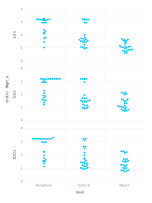

In [124]:
draw(SVG(6inch,8inch),plot(dfplot[dfplot.τ_a .!= 3.0s,:],x=:level,y=:eratio,ygroup=:τ_a,
        Geom.subplot_grid(Geom.beeswarm)))

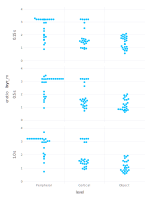

In [125]:
draw(SVG(6inch,8inch),plot(dfplot[dfplot.τ_m .!= 350ms,:],x=:level,y=:eratio,ygroup=:τ_m,Geom.subplot_grid(Geom.beeswarm)))

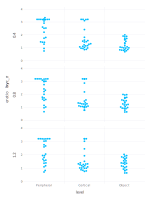

In [126]:
draw(SVG(6inch,8inch),plot(dfplot[dfplot.c_σ .!= 0.2,:],x=:level,y=:eratio,ygroup=:c_σ,Geom.subplot_grid(Geom.beeswarm)))